# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Read Dataset

In [2]:
df = pd.read_csv('news_dataset.csv')

In [3]:
df.columns

Index(['Headline', 'Article', 'Category', 'ARTS & CULTURE',
       'BUSINESS & FINANCE', 'COLLEGE', 'COMEDY', 'CRIME', 'CURRENT AFFAIRS',
       'EDUCATION', 'ENTERTAINMENT', 'ENVIRONMENT', 'FOOD & BEVERAGES',
       'HEALTH & FITNESS', 'HEALTHY LIVING', 'LIFESTYLE', 'MEDIA', 'POLITICS',
       'RELIGION', 'SCIENCE', 'SPORTS', 'STYLE & BEAUTY', 'TECHNOLOGY',
       'TOURISM', 'WEDDINGS', 'WELLNESS', 'WOMEN'],
      dtype='object')

# Clean Dataset

In [4]:
df.isnull().sum()

Headline                 3
Article               9994
Category                 0
ARTS & CULTURE           0
BUSINESS & FINANCE       0
COLLEGE                  0
COMEDY                   0
CRIME                    0
CURRENT AFFAIRS          0
EDUCATION                0
ENTERTAINMENT            0
ENVIRONMENT              0
FOOD & BEVERAGES         0
HEALTH & FITNESS         0
HEALTHY LIVING           0
LIFESTYLE                0
MEDIA                    0
POLITICS                 0
RELIGION                 0
SCIENCE                  0
SPORTS                   0
STYLE & BEAUTY           0
TECHNOLOGY               0
TOURISM                  0
WEDDINGS                 0
WELLNESS                 0
WOMEN                    0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

Headline              0
Article               0
Category              0
ARTS & CULTURE        0
BUSINESS & FINANCE    0
COLLEGE               0
COMEDY                0
CRIME                 0
CURRENT AFFAIRS       0
EDUCATION             0
ENTERTAINMENT         0
ENVIRONMENT           0
FOOD & BEVERAGES      0
HEALTH & FITNESS      0
HEALTHY LIVING        0
LIFESTYLE             0
MEDIA                 0
POLITICS              0
RELIGION              0
SCIENCE               0
SPORTS                0
STYLE & BEAUTY        0
TECHNOLOGY            0
TOURISM               0
WEDDINGS              0
WELLNESS              0
WOMEN                 0
dtype: int64

# Clean text using lemmatization, Regrex

In [7]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

my_sw = ['make', 'amp',  'news','new' ,'time', 'u','s', 'photos',  'get', 'say']
def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw  
  
def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text = re.sub("(\d|\W)+"," ",text)    
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)

In [8]:
df['text'] = df['Headline'] + " " + df['Article']

In [9]:
df.head()

,Headline,Article,Category,ARTS & CULTURE,BUSINESS & FINANCE,COLLEGE,COMEDY,CRIME,CURRENT AFFAIRS,EDUCATION,...,RELIGION,SCIENCE,SPORTS,STYLE & BEAUTY,TECHNOLOGY,TOURISM,WEDDINGS,WELLNESS,WOMEN,text
0,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...","{'ENTERTAINMENT', 'COMEDY'}",0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,23 Of The Funniest Tweets About Cats And Dogs ...
1,Puerto Ricans Desperate For Water After Hurric...,More than half a million people remained witho...,{'CURRENT AFFAIRS'},0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Puerto Ricans Desperate For Water After Hurric...
2,How A New Documentary Captures The Complexity ...,"In ""Mija,"" director Isabel Castro combined mus...",{'ARTS & CULTURE'},1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,How A New Documentary Captures The Complexity ...
3,Biden At UN To Call Russian War An Affront To ...,White House officials say the crux of the pres...,{'CURRENT AFFAIRS'},0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Biden At UN To Call Russian War An Affront To ...
4,World Cup Captains Want To Wear Rainbow Armban...,FIFA has come under pressure from several Euro...,{'CURRENT AFFAIRS'},0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,World Cup Captains Want To Wear Rainbow Armban...


In [10]:
df['text'] = df['text'].apply(clean_txt)

In [11]:
df.head()

,Headline,Article,Category,ARTS & CULTURE,BUSINESS & FINANCE,COLLEGE,COMEDY,CRIME,CURRENT AFFAIRS,EDUCATION,...,RELIGION,SCIENCE,SPORTS,STYLE & BEAUTY,TECHNOLOGY,TOURISM,WEDDINGS,WELLNESS,WOMEN,text
0,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...","{'ENTERTAINMENT', 'COMEDY'}",0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,funniest tweet cat dog week sept dog dont unde...
1,Puerto Ricans Desperate For Water After Hurric...,More than half a million people remained witho...,{'CURRENT AFFAIRS'},0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,puerto ricans desperate water hurricane fiona ...
2,How A New Documentary Captures The Complexity ...,"In ""Mija,"" director Isabel Castro combined mus...",{'ARTS & CULTURE'},1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,documentary capture complexity child immigrant...
3,Biden At UN To Call Russian War An Affront To ...,White House officials say the crux of the pres...,{'CURRENT AFFAIRS'},0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,biden call russian war affront body charter wh...
4,World Cup Captains Want To Wear Rainbow Armban...,FIFA has come under pressure from several Euro...,{'CURRENT AFFAIRS'},0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,world cup captain want wear rainbow armbands q...


In [12]:
dfk = df

In [13]:
dfk.shape

(160915, 28)

In [14]:
df = dfk[:140000]

In [15]:
df.shape

(140000, 28)

# Spliting dataset into Training and Validation data

In [16]:
train, test = train_test_split(df, random_state=42, test_size=0.30, shuffle=True)
train_text = train['text'].values.astype('U')
test_text = test['text'].values.astype('U')

In [17]:
train_text.shape

(98000,)

In [18]:
y_train = train.drop(['text','Article','Headline','Category'],axis=1)

In [19]:
y_train.shape

(98000, 24)

In [20]:
y_train.shape

(98000, 24)

In [21]:
y_test = test.drop(['text','Article','Headline','Category'],axis=1)

In [22]:
y_test.shape

(42000, 24)

In [23]:
y_test.head()

,ARTS & CULTURE,BUSINESS & FINANCE,COLLEGE,COMEDY,CRIME,CURRENT AFFAIRS,EDUCATION,ENTERTAINMENT,ENVIRONMENT,FOOD & BEVERAGES,...,POLITICS,RELIGION,SCIENCE,SPORTS,STYLE & BEAUTY,TECHNOLOGY,TOURISM,WEDDINGS,WELLNESS,WOMEN
41488,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56699,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148318,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
139994,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59962,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# LabelPowerset,countvector, logistic Regression

In [24]:
clf = Pipeline([
    ('cv', CountVectorizer(ngram_range=(1,3),max_features=5000)),
                ('clf',  LabelPowerset(LogisticRegression()))])

In [25]:
clf.fit(train_text,y_train)

c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer(max_features=5000, ngram_range=(1, 3))),
                ('clf',
                 LabelPowerset(classifier=LogisticRegression(),
                               require_dense=[True, True]))])

In [26]:
clf_predictions = clf.predict(test_text)

In [24]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [29]:
print("Accuracy = ",accuracy_score(y_test,clf_predictions))
print("F1 score = ",f1_score(y_test,clf_predictions, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,clf_predictions))

Accuracy =  0.7083571428571429
F1 score =  0.7197752222112156
Hamming loss =  0.030870039682539683


In [47]:
print(classification_report(y_test, clf_predictions))

              precision    recall  f1-score   support

           0       0.49      0.40      0.44       731
           1       0.87      0.89      0.88      7735
           2       0.51      0.34      0.40       295
           3       0.56      0.49      0.52      1416
           4       0.66      0.65      0.65       839
           5       0.70      0.69      0.70      1513
           6       0.64      0.46      0.53       557
           7       0.74      0.80      0.77      6840
           8       0.56      0.39      0.46       452
           9       0.71      0.75      0.73      1905
          10       0.67      0.73      0.70      6595
          11       0.31      0.24      0.27      1514
          12       0.77      0.78      0.77      4848
          13       0.58      0.52      0.55       720
          14       0.98      0.97      0.98       403
          15       0.56      0.46      0.51       557
          16       0.71      0.64      0.67      2038
          17       0.74    

# LabelPowerSet, Tfidfvector, Logistic Regression

In [48]:
clf2 = Pipeline([
    ('tfidf',TfidfVectorizer(strip_accents='ascii', analyzer='word', ngram_range=(1,3), norm='l2', max_features = 5000)),
                ('clf2',  LabelPowerset(LogisticRegression()))])

In [49]:
clf2.fit(train_text,y_train)

c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 3),
                                 strip_accents='ascii')),
                ('clf2',
                 LabelPowerset(classifier=LogisticRegression(),
                               require_dense=[True, True]))])

In [50]:
clf_predictions2 = clf2.predict(test_text)

In [51]:
print("Accuracy = ",accuracy_score(y_test,clf_predictions2))
print("F1 score = ",f1_score(y_test,clf_predictions2, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,clf_predictions2))

Accuracy =  0.7208095238095238
F1 score =  0.7312736004856232
Hamming loss =  0.0298640873015873


In [52]:
print(classification_report(y_test, clf_predictions2))

              precision    recall  f1-score   support

           0       0.60      0.36      0.45       731
           1       0.85      0.90      0.87      7735
           2       0.60      0.31      0.41       295
           3       0.64      0.50      0.56      1416
           4       0.69      0.65      0.67       839
           5       0.72      0.69      0.70      1513
           6       0.70      0.41      0.51       557
           7       0.74      0.81      0.77      6840
           8       0.62      0.30      0.41       452
           9       0.74      0.77      0.75      1905
          10       0.64      0.81      0.71      6595
          11       0.44      0.16      0.23      1514
          12       0.78      0.79      0.79      4848
          13       0.69      0.49      0.57       720
          14       0.96      0.88      0.92       403
          15       0.72      0.45      0.55       557
          16       0.77      0.56      0.65      2038
          17       0.79    

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# LabelPowerset, countvector, Multinominal naive bayes

In [54]:
clf3 = Pipeline([
    ('cv', CountVectorizer(ngram_range=(1,3),max_features=5000)),
                ('clf3',  LabelPowerset(MultinomialNB(fit_prior=True, class_prior=None)))])

In [55]:
clf3.fit(train_text,y_train)

Pipeline(steps=[('cv', CountVectorizer(max_features=5000, ngram_range=(1, 3))),
                ('clf',
                 LabelPowerset(classifier=MultinomialNB(),
                               require_dense=[True, True]))])

In [56]:
clf_predictions3 = clf3.predict(test_text)

In [57]:
print("Accuracy = ",accuracy_score(y_test,clf_predictions3))
print("F1 score = ",f1_score(y_test,clf_predictions3, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,clf_predictions3))

Accuracy =  0.6836190476190476
F1 score =  0.6973876155615418
Hamming loss =  0.033544642857142856


In [58]:
print(classification_report(y_test, clf_predictions3))

              precision    recall  f1-score   support

           0       0.42      0.42      0.42       731
           1       0.97      0.79      0.87      7735
           2       0.40      0.38      0.39       295
           3       0.51      0.59      0.55      1416
           4       0.51      0.77      0.61       839
           5       0.68      0.66      0.67      1513
           6       0.47      0.57      0.51       557
           7       0.76      0.76      0.76      6840
           8       0.44      0.47      0.46       452
           9       0.67      0.81      0.73      1905
          10       0.65      0.71      0.68      6595
          11       0.27      0.22      0.24      1514
          12       0.76      0.77      0.77      4848
          13       0.46      0.55      0.50       720
          14       0.85      0.96      0.90       403
          15       0.52      0.52      0.52       557
          16       0.63      0.66      0.64      2038
          17       0.82    

# LabelPowerset, Tfidf, Multinominal naive bayes

In [59]:
clf4 = Pipeline([
    ('tfidf',TfidfVectorizer(strip_accents='ascii', analyzer='word', ngram_range=(1,3), norm='l2', max_features = 5000)),
                ('clf4',  LabelPowerset(MultinomialNB(fit_prior=True, class_prior=None)))])

In [60]:
clf4.fit(train_text,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 3),
                                 strip_accents='ascii')),
                ('clf4',
                 LabelPowerset(classifier=MultinomialNB(),
                               require_dense=[True, True]))])

In [61]:
clf_predictions4 = clf4.predict(test_text)

In [62]:
print("Accuracy = ",accuracy_score(y_test,clf_predictions4))
print("F1 score = ",f1_score(y_test,clf_predictions4, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,clf_predictions4))

Accuracy =  0.670047619047619
F1 score =  0.6827350306791734
Hamming loss =  0.03570238095238095


In [63]:
print(classification_report(y_test, clf_predictions4))

              precision    recall  f1-score   support

           0       0.80      0.10      0.18       731
           1       0.86      0.86      0.86      7735
           2       0.75      0.05      0.10       295
           3       0.65      0.40      0.50      1416
           4       0.68      0.60      0.64       839
           5       0.65      0.67      0.66      1513
           6       0.89      0.06      0.11       557
           7       0.64      0.83      0.73      6840
           8       0.73      0.15      0.25       452
           9       0.74      0.73      0.74      1905
          10       0.53      0.85      0.66      6595
          11       0.68      0.03      0.07      1514
          12       0.79      0.74      0.76      4848
          13       0.77      0.28      0.41       720
          14       0.95      0.86      0.90       403
          15       0.79      0.27      0.40       557
          16       0.81      0.41      0.55      2038
          17       0.85    

# LabelPowerset, countvector, linear svc

In [64]:
clf5 = Pipeline([
    ('cv', CountVectorizer(ngram_range=(1,3),max_features=5000)),
                ('clf5',  LabelPowerset(LinearSVC()))])

In [65]:
clf5.fit(train_text,y_train)

c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('cv', CountVectorizer(max_features=5000, ngram_range=(1, 3))),
                ('clf5',
                 LabelPowerset(classifier=LinearSVC(),
                               require_dense=[True, True]))])

In [66]:
clf_predictions5 = clf5.predict(test_text)

In [67]:
print("Accuracy = ",accuracy_score(y_test,clf_predictions5))
print("F1 score = ",f1_score(y_test,clf_predictions5, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,clf_predictions5))

Accuracy =  0.6928571428571428
F1 score =  0.7049751199013794
Hamming loss =  0.032526785714285716


In [68]:
print(classification_report(y_test, clf_predictions5))

              precision    recall  f1-score   support

           0       0.41      0.38      0.39       731
           1       0.87      0.87      0.87      7735
           2       0.33      0.34      0.34       295
           3       0.55      0.49      0.52      1416
           4       0.57      0.61      0.59       839
           5       0.69      0.68      0.69      1513
           6       0.44      0.47      0.45       557
           7       0.75      0.77      0.76      6840
           8       0.43      0.38      0.41       452
           9       0.68      0.74      0.71      1905
          10       0.67      0.73      0.70      6595
          11       0.32      0.18      0.23      1514
          12       0.75      0.77      0.76      4848
          13       0.50      0.52      0.51       720
          14       0.96      0.96      0.96       403
          15       0.46      0.45      0.46       557
          16       0.64      0.62      0.63      2038
          17       0.73    

# LabelPowerset, Tfidf, linear svc

In [69]:
clf6 = Pipeline([
    ('cv', TfidfVectorizer(strip_accents='ascii', analyzer='word', ngram_range=(1,3), norm='l2', max_features = 5000)),
                ('clf6',  LabelPowerset(LinearSVC()))])

In [70]:
clf6.fit(train_text,y_train)

Pipeline(steps=[('cv',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 3),
                                 strip_accents='ascii')),
                ('clf6',
                 LabelPowerset(classifier=LinearSVC(),
                               require_dense=[True, True]))])

In [71]:
clf_predictions6 = clf6.predict(test_text)

In [72]:
print("Accuracy = ",accuracy_score(y_test,clf_predictions6))
print("F1 score = ",f1_score(y_test,clf_predictions6, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,clf_predictions6))

Accuracy =  0.7231190476190477
F1 score =  0.7330999095557486
Hamming loss =  0.02956845238095238


In [73]:
print(classification_report(y_test, clf_predictions6))

              precision    recall  f1-score   support

           0       0.53      0.41      0.46       731
           1       0.88      0.89      0.88      7735
           2       0.53      0.38      0.44       295
           3       0.61      0.49      0.54      1416
           4       0.66      0.66      0.66       839
           5       0.71      0.71      0.71      1513
           6       0.62      0.50      0.55       557
           7       0.77      0.79      0.78      6840
           8       0.56      0.38      0.46       452
           9       0.71      0.78      0.74      1905
          10       0.66      0.78      0.72      6595
          11       0.40      0.18      0.25      1514
          12       0.77      0.80      0.78      4848
          13       0.59      0.53      0.56       720
          14       0.97      0.96      0.96       403
          15       0.61      0.49      0.54       557
          16       0.70      0.63      0.66      2038
          17       0.76    

# Category of news

In [35]:
category = y_test.columns

In [36]:
category

Index(['ARTS & CULTURE', 'BUSINESS & FINANCE', 'COLLEGE', 'COMEDY', 'CRIME',
       'CURRENT AFFAIRS', 'EDUCATION', 'ENTERTAINMENT', 'ENVIRONMENT',
       'FOOD & BEVERAGES', 'HEALTH & FITNESS', 'HEALTHY LIVING', 'LIFESTYLE',
       'MEDIA', 'POLITICS', 'RELIGION', 'SCIENCE', 'SPORTS', 'STYLE & BEAUTY',
       'TECHNOLOGY', 'TOURISM', 'WEDDINGS', 'WELLNESS', 'WOMEN'],
      dtype='object')

In [43]:
category = np.array(category)

In [44]:
category.shape

(24,)

# BinaryRelevance, TfidfVector, Logistic Regression

In [74]:
clf7 = Pipeline([
    ('tfidf',TfidfVectorizer(strip_accents='ascii', analyzer='word', ngram_range=(1,3), norm='l2', max_features = 3000)),
                ('clf7', BinaryRelevance(LogisticRegression()))])

In [75]:
clf7.fit(train_text,y_train)

c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=3000, ngram_range=(1, 3),
                                 strip_accents='ascii')),
                ('clf7',
                 BinaryRelevance(classifier=LogisticRegression(),
                                 require_dense=[True, True]))])

In [76]:
clf_predictions7 = clf7.predict(test_text)

In [77]:
print("Accuracy = ",accuracy_score(y_test,clf_predictions7))
print("F1 score = ",f1_score(y_test,clf_predictions7, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,clf_predictions7))

Accuracy =  0.5046666666666667
F1 score =  0.6557116703796018
Hamming loss =  0.030970238095238096


In [78]:
print(classification_report(y_test, clf_predictions7))

              precision    recall  f1-score   support

           0       0.74      0.14      0.24       731
           1       0.95      0.81      0.87      7735
           2       0.64      0.14      0.23       295
           3       0.75      0.29      0.42      1416
           4       0.78      0.41      0.54       839
           5       0.85      0.41      0.56      1513
           6       0.73      0.27      0.40       557
           7       0.83      0.57      0.68      6840
           8       0.87      0.13      0.22       452
           9       0.82      0.54      0.65      1905
          10       0.76      0.55      0.64      6595
          11       0.51      0.04      0.07      1514
          12       0.85      0.62      0.72      4848
          13       0.82      0.23      0.36       720
          14       0.97      0.74      0.84       403
          15       0.77      0.25      0.37       557
          16       0.84      0.38      0.52      2038
          17       0.87    

c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# BinaryRelevance, countVector, Logistic Regression

In [26]:
clf8 = Pipeline([
    ('tfidf',CountVectorizer(ngram_range=(1,3),max_features=2000)),
    ('clf8', BinaryRelevance(LogisticRegression()))])

In [27]:
clf8.fit(train_text,y_train)

c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Pipeline(steps=[('tfidf',
                 CountVectorizer(max_features=2000, ngram_range=(1, 3))),
                ('clf8',
                 BinaryRelevance(classifier=LogisticRegression(),
                                 require_dense=[True, True]))])

In [28]:
clf_predictions8 = clf8.predict(test_text)

In [31]:
print("Accuracy = ",accuracy_score(y_test,clf_predictions8))
print("F1 score = ",f1_score(y_test,clf_predictions8, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,clf_predictions8))

Accuracy =  0.5022619047619048
F1 score =  0.6544175053206849
Hamming loss =  0.032056547619047616


In [32]:
print(classification_report(y_test, clf_predictions8))

              precision    recall  f1-score   support

           0       0.54      0.14      0.23       731
           1       0.93      0.81      0.87      7735
           2       0.54      0.17      0.25       295
           3       0.67      0.28      0.40      1416
           4       0.69      0.45      0.55       839
           5       0.77      0.48      0.59      1513
           6       0.65      0.35      0.46       557
           7       0.78      0.57      0.66      6840
           8       0.59      0.20      0.30       452
           9       0.78      0.55      0.64      1905
          10       0.74      0.55      0.63      6595
          11       0.33      0.05      0.09      1514
          12       0.82      0.62      0.71      4848
          13       0.65      0.28      0.39       720
          14       0.97      0.96      0.96       403
          15       0.64      0.27      0.38       557
          16       0.80      0.46      0.59      2038
          17       0.83    

c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# BinaryRelevance, TfidfVector, MNB

In [33]:
clf9 = Pipeline([
    ('tfidf',TfidfVectorizer(strip_accents='ascii', analyzer='word', ngram_range=(1,3), norm='l2', max_features = 2000)),
                ('clf9', BinaryRelevance(MultinomialNB(fit_prior=True, class_prior=None)))])

In [34]:
clf9.fit(train_text,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=2000, ngram_range=(1, 3),
                                 strip_accents='ascii')),
                ('clf9',
                 BinaryRelevance(classifier=MultinomialNB(),
                                 require_dense=[True, True]))])

In [35]:
clf_predictions9 = clf9.predict(test_text)

In [36]:
print("Accuracy = ",accuracy_score(y_test,clf_predictions9))
print("F1 score = ",f1_score(y_test,clf_predictions9, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,clf_predictions9))

Accuracy =  0.3636904761904762
F1 score =  0.5335599398999976
Hamming loss =  0.037573412698412696


In [37]:
print(classification_report(y_test, clf_predictions9))

              precision    recall  f1-score   support

           0       0.67      0.00      0.01       731
           1       0.94      0.76      0.84      7735
           2       1.00      0.01      0.01       295
           3       0.68      0.18      0.28      1416
           4       0.76      0.28      0.41       839
           5       0.83      0.27      0.41      1513
           6       0.85      0.03      0.06       557
           7       0.82      0.41      0.54      6840
           8       0.88      0.02      0.03       452
           9       0.83      0.36      0.50      1905
          10       0.75      0.43      0.55      6595
          11       0.42      0.02      0.03      1514
          12       0.83      0.45      0.59      4848
          13       0.73      0.03      0.06       720
          14       0.94      0.64      0.76       403
          15       0.93      0.07      0.14       557
          16       0.83      0.18      0.29      2038
          17       0.93    

c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# BinaryRelevance, countVector, MNB

In [38]:
clf10 = Pipeline([
    ('tfidf',CountVectorizer(ngram_range=(1,3),max_features=3000)),
                ('clf10', BinaryRelevance(MultinomialNB(fit_prior=True, class_prior=None)))])

In [39]:
clf10.fit(train_text,y_train)

Pipeline(steps=[('tfidf',
                 CountVectorizer(max_features=3000, ngram_range=(1, 3))),
                ('clf10',
                 BinaryRelevance(classifier=MultinomialNB(),
                                 require_dense=[True, True]))])

In [40]:
clf_predictions10 = clf10.predict(test_text)

In [41]:
print("Accuracy = ",accuracy_score(y_test,clf_predictions10))
print("F1 score = ",f1_score(y_test,clf_predictions10, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,clf_predictions10))

Accuracy =  0.3474285714285714
F1 score =  0.5991287836479392
Hamming loss =  0.05696825396825397


In [42]:
print(classification_report(y_test, clf_predictions10))

              precision    recall  f1-score   support

           0       0.20      0.50      0.29       731
           1       0.90      0.81      0.85      7735
           2       0.21      0.54      0.30       295
           3       0.32      0.63      0.43      1416
           4       0.35      0.78      0.48       839
           5       0.37      0.77      0.50      1513
           6       0.32      0.71      0.44       557
           7       0.59      0.78      0.68      6840
           8       0.22      0.52      0.31       452
           9       0.46      0.84      0.59      1905
          10       0.53      0.83      0.65      6595
          11       0.17      0.63      0.26      1514
          12       0.58      0.80      0.68      4848
          13       0.21      0.61      0.31       720
          14       0.51      0.98      0.67       403
          15       0.25      0.56      0.35       557
          16       0.44      0.67      0.53      2038
          17       0.62    

c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# BinaryRelevance, TfidfVector, Linear svc

In [43]:
clf11 = Pipeline([
    ('tfidf',TfidfVectorizer(strip_accents='ascii', analyzer='word', ngram_range=(1,3), norm='l2', max_features = 2000)),
                ('clf11', BinaryRelevance(LinearSVC()))])

In [44]:
clf11.fit(train_text,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=2000, ngram_range=(1, 3),
                                 strip_accents='ascii')),
                ('clf11',
                 BinaryRelevance(classifier=LinearSVC(),
                                 require_dense=[True, True]))])

In [45]:
clf_predictions11 = clf11.predict(test_text)

In [46]:
print("Accuracy = ",accuracy_score(y_test,clf_predictions11))
print("F1 score = ",f1_score(y_test,clf_predictions11, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,clf_predictions11))

Accuracy =  0.5148809523809523
F1 score =  0.6578419315166031
Hamming loss =  0.031464285714285715


In [47]:
print(classification_report(y_test, clf_predictions11))

              precision    recall  f1-score   support

           0       0.70      0.13      0.22       731
           1       0.94      0.81      0.87      7735
           2       0.61      0.14      0.22       295
           3       0.69      0.24      0.35      1416
           4       0.73      0.48      0.58       839
           5       0.78      0.47      0.59      1513
           6       0.71      0.33      0.45       557
           7       0.80      0.56      0.66      6840
           8       0.72      0.17      0.27       452
           9       0.80      0.56      0.66      1905
          10       0.74      0.57      0.64      6595
          11       0.66      0.04      0.07      1514
          12       0.83      0.63      0.71      4848
          13       0.72      0.24      0.36       720
          14       0.97      0.92      0.94       403
          15       0.68      0.26      0.38       557
          16       0.78      0.41      0.54      2038
          17       0.85    

c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# BinaryRelevance, countVector, Linear svc

In [48]:
clf12 = Pipeline([
    ('tfidf',CountVectorizer(ngram_range=(1,3),max_features=3000)),
                ('clf12', BinaryRelevance(LinearSVC()))])

In [49]:
clf12.fit(train_text,y_train)

c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to co

Pipeline(steps=[('tfidf',
                 CountVectorizer(max_features=3000, ngram_range=(1, 3))),
                ('clf12',
                 BinaryRelevance(classifier=LinearSVC(),
                                 require_dense=[True, True]))])

In [50]:
clf_predictions12 = clf12.predict(test_text)

In [51]:
print("Accuracy = ",accuracy_score(y_test,clf_predictions12))
print("F1 score = ",f1_score(y_test,clf_predictions12, average="micro"))
print("Hamming loss = ",hamming_loss(y_test,clf_predictions12))

Accuracy =  0.5338333333333334
F1 score =  0.6770742629680309
Hamming loss =  0.030904761904761904


In [52]:
print(classification_report(y_test, clf_predictions12))

              precision    recall  f1-score   support

           0       0.52      0.21      0.30       731
           1       0.93      0.83      0.88      7735
           2       0.33      0.24      0.28       295
           3       0.71      0.35      0.47      1416
           4       0.63      0.53      0.58       839
           5       0.73      0.55      0.63      1513
           6       0.54      0.41      0.47       557
           7       0.80      0.61      0.69      6840
           8       0.41      0.26      0.32       452
           9       0.77      0.62      0.69      1905
          10       0.76      0.58      0.65      6595
          11       0.41      0.05      0.08      1514
          12       0.82      0.65      0.73      4848
          13       0.60      0.34      0.44       720
          14       0.96      0.97      0.96       403
          15       0.59      0.36      0.45       557
          16       0.78      0.50      0.61      2038
          17       0.81    

c:\users\rahul kumar shah\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ClassifierChain

In [25]:
from skmultilearn.problem_transform import ClassifierChain

In [26]:
vec = TfidfVectorizer(strip_accents='ascii', analyzer='word', ngram_range=(1,3), norm='l2', max_features = 1000)

In [27]:
selected_labels = y_train.columns[y_train.sum(axis = 0, skipna = True) > 0].tolist()
y_train = y_train.filter(selected_labels, axis=1)
y_test = y_test.filter(selected_labels, axis=1)

In [28]:
vec.fit(train_text)
vec.fit(test_text)

TfidfVectorizer(max_features=1000, ngram_range=(1, 3), strip_accents='ascii')

In [29]:
x_train = vec.transform(train_text)
x_test = vec.transform(test_text)

In [30]:
clf13 = ClassifierChain(LogisticRegression(solver='sag'))
clf13.fit(x_train, y_train)
clf13_proba = clf13.predict_proba(x_test)

In [32]:
type(clf13_proba)

scipy.sparse.csc.csc_matrix

In [33]:
clf13_proba.shape

(42000, 24)

In [35]:
th = []
f = []
ham = []
ac = []
for t in range (5,60): # threshold value
    y_pred_new = (clf13_proba >= t/100).astype(int)
    #print("t =" ,t/100)
    #print("Accuracy = ",accuracy_score(y_test,y_pred_new))
    #print("F1 = ",f1_score(y_test,y_pred_new, average="micro"))
    #print("Hamming loss = ",hamming_loss(y_test,y_pred_new))
    th.append(t)
    ac.append(accuracy_score(y_test,y_pred_new))
    f.append(f1_score(y_test,y_pred_new, average="micro"))
    ham.append(hamming_loss(y_test,y_pred_new))
    

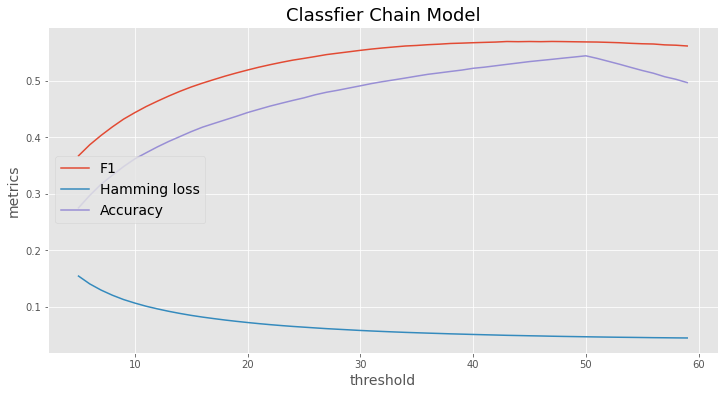

In [36]:
plt.rcParams["figure.figsize"] = (12,6)
with plt.style.context('ggplot'):
    plt.plot(th, f)
    plt.plot(th, ham)
    plt.plot(th, ac)
    plt.legend(['F1', 'Hamming loss', 'Accuracy'], loc='center left', fontsize = 14)
    plt.ylabel("metrics", fontsize = 14)
    plt.xlabel("threshold", fontsize = 14)
    plt.title("Classfier Chain Model", fontsize = 18)
plt.show()

# Biased check

In [69]:
x_test = v.transform([test_text[12590]])

In [70]:
k = clf6.predict(x_test)

In [42]:
k = clf2.predict(dataset)
print(k)

  (0, 8)	1
  (1, 17)	1
  (2, 0)	1


In [71]:
print(k)

  (0, 7)	1.0


In [72]:
test_text[12590]

'luke bryan defend katy perry uncomfortable american idol kiss unfortunate stuff like turn story big'